In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/salary.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()
#Its a weight assigned by the Census Bureau. 
#**The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
len(data['age'])

32561

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
data.size

488415

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#data sparcity
data.drop(['capital-gain','capital-loss'], inplace=True, axis=1)

In [ ]:
data.size

423293

In [ ]:
data.duplicated().sum()

26

In [ ]:
data.drop_duplicates(keep = 'first' , inplace=True)

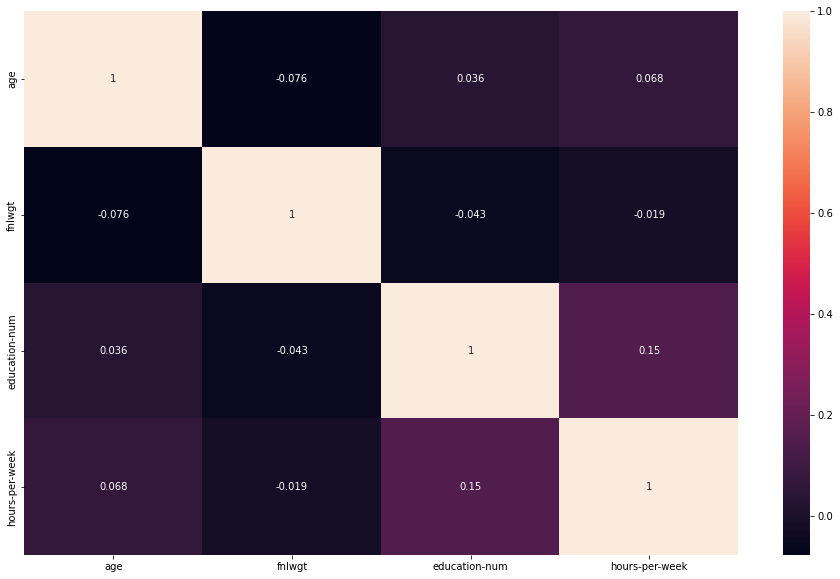

In [ ]:
corr = data.corr()
features = corr.index
plt.figure(figsize=(16,10))
ax = sns.heatmap(data[features].corr(), annot=True)

In [ ]:
# To find number of unique values present in each feature
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [ ]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

# **Onehot Encoding**

In [ ]:
#cat_cols=['race','sex']
data=pd.get_dummies(data,columns=['race','sex'],drop_first=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,hours-per-week,native-country,salary,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,40,United-States,<=50K,0,0,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,13,United-States,<=50K,0,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,40,United-States,<=50K,0,0,0,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,40,United-States,<=50K,0,1,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,40,Cuba,<=50K,0,1,0,0,0


In [ ]:
#data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,hours-per-week,native-country,salary,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,40,United-States,<=50K,0,0,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,13,United-States,<=50K,0,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,40,United-States,<=50K,0,0,0,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,40,United-States,<=50K,0,1,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,40,Cuba,<=50K,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


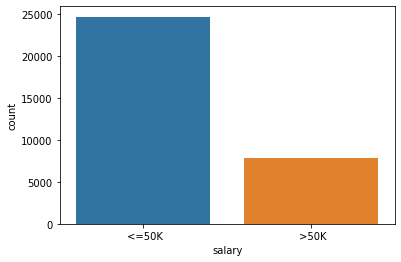

In [ ]:
sns.countplot(data["salary"])

In [ ]:
data['salary'].value_counts()

 <=50K    24696
 >50K      7839
Name: salary, dtype: int64

In [ ]:
#sns.pairplot(data)

In [ ]:
cat = []
num = []
li = list(data.columns)
for i in li:
    if data[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)
for i in cat:
    print(data[i].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' 

In [ ]:
data = data.replace("\?", np.nan, regex=True)

In [ ]:
data.isnull().sum()

age                            0
workclass                   1836
fnlwgt                         0
education                      0
education-num                  0
marital-status                 0
occupation                  1843
relationship                   0
hours-per-week                 0
native-country               582
salary                         0
race_ Asian-Pac-Islander       0
race_ Black                    0
race_ Other                    0
race_ White                    0
sex_ Male                      0
dtype: int64

In [ ]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [ ]:
data.isnull().sum()

age                         0
workclass                   0
fnlwgt                      0
education                   0
education-num               0
marital-status              0
occupation                  0
relationship                0
hours-per-week              0
native-country              0
salary                      0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
sex_ Male                   0
dtype: int64

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat:
  data[col] = encoder.fit_transform(data[col])

In [ ]:
data['salary'].value_counts()

0    24696
1     7839
Name: salary, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32535 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32535 non-null  int64
 1   workclass                 32535 non-null  int64
 2   fnlwgt                    32535 non-null  int64
 3   education                 32535 non-null  int64
 4   education-num             32535 non-null  int64
 5   marital-status            32535 non-null  int64
 6   occupation                32535 non-null  int64
 7   relationship              32535 non-null  int64
 8   hours-per-week            32535 non-null  int64
 9   native-country            32535 non-null  int64
 10  salary                    32535 non-null  int64
 11  race_ Asian-Pac-Islander  32535 non-null  uint8
 12  race_ Black               32535 non-null  uint8
 13  race_ Other               32535 non-null  uint8
 14  race_ White               32535 non-nu

In [ ]:
X = data.drop(columns='salary', axis=1)
Y = data['salary']

Balancing Dataset

In [ ]:
from imblearn. over_sampling import SMOTE

from collections import Counter

counter= Counter(Y)

print('Before', counter)

# oversampling the train dataset using SMOTE

smt=SMOTE ()

#X_train, y_train smt.fit_resample (X_train, y_train)

X_sm, Y_sm=smt.fit_resample(X,Y)

counter= Counter(Y_sm)

print("After", counter)

Before Counter({1: 24696, 0: 7839})
After Counter({1: 24696, 0: 24696})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=2)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)
y_pred_logreg=model_log.predict(X_test)
report=metrics.classification_report(Y_test,y_pred_logreg)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred_logreg)*100)
print(report) 

Accuracy:  49.86334649255998
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4953
           1       0.50      1.00      0.67      4926

    accuracy                           0.50      9879
   macro avg       0.25      0.50      0.33      9879
weighted avg       0.25      0.50      0.33      9879



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)
report=metrics.classification_report(Y_test,y_pred_dt)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred_dt)*100)
print(report)

Accuracy:  83.81415122988156
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4953
           1       0.84      0.84      0.84      4926

    accuracy                           0.84      9879
   macro avg       0.84      0.84      0.84      9879
weighted avg       0.84      0.84      0.84      9879



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

# Train Decision Tree Classifer
model_rf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_rf = model_rf.predict(X_test)
report=metrics.classification_report(Y_test,y_pred_rf)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred_rf)*100)
print(report)

Accuracy:  87.97449134527785
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4953
           1       0.88      0.88      0.88      4926

    accuracy                           0.88      9879
   macro avg       0.88      0.88      0.88      9879
weighted avg       0.88      0.88      0.88      9879



XGBoost

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)
y_pred_xgb=model_xgb.predict(X_test)
report=metrics.classification_report(Y_test,y_pred_xgb)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred_xgb)*100)
print(report)

Accuracy:  86.85089583965988
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4953
           1       0.88      0.85      0.87      4926

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879



XGBoost with Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={
    "learning_rate":[0.05,0.1,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,7,8,9,10,13,15,18,20],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
}
model = XGBClassifier(random_state=23)
random_search=RandomizedSearchCV(model,param_distributions=params, cv=5,n_iter=15,verbose=5,n_jobs=12)
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=23), n_iter=15,
                   n_jobs=12,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      13, 15, 18, 20]},
                   verbose=5)

In [ ]:
random_search_best_params=random_search.best_estimator_
random_search_best_params

XGBClassifier(gamma=0.0, learning_rate=0.15, max_depth=9, random_state=23)

In [ ]:
y_pred_xgb_hpt=random_search_best_params.predict(X_test)
report=metrics.classification_report(Y_test,y_pred_xgb_hpt)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred_xgb_hpt)*100)
print(report)

Accuracy:  88.52110537503796
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4953
           1       0.88      0.89      0.89      4926

    accuracy                           0.89      9879
   macro avg       0.89      0.89      0.89      9879
weighted avg       0.89      0.89      0.89      9879

